In [80]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import h5py
from importlib import reload
import PIVutils
import PODutils
import math

In [440]:
BoxSize = 10

X, Y = np.meshgrid(np.arange(-1*BoxSize, BoxSize+1), np.arange(-1*BoxSize, BoxSize+1))

U = np.zeros([2*BoxSize+1,2*BoxSize+1])
V = U.copy()
R = np.hypot(X, Y)
T = np.arctan2(Y,X)
#for i in range(X.shape[0]):
#    T[i] = math.atan2(Y[i],X[i])

In [409]:
#Create Rankine Vortex
Circ = 30
r = 3

Ut = Circ*R/(2*np.pi*r**2)
#Ut[R>=r] = Circ/(2*np.pi*R[R>=r])
Ut[R>=r] = Circ/(2*np.pi*r)      #make velocities constant outside core

#Now convert back to cartesian velocities
Uvort = Ut*np.sin(T)
Vvort = -1*Ut*np.cos(T)

(-10.0, 10.0, -10.0, 10.0)

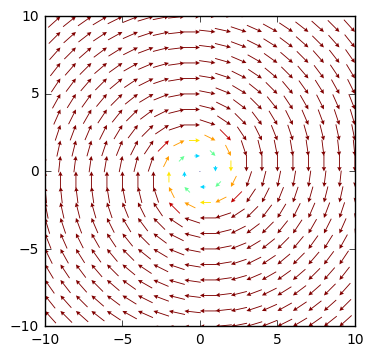

In [399]:
plt.figure()
M = np.hypot(Uvort, Vvort)
Q = plt.quiver(X, Y, Uvort, Vvort, M, units='x', pivot='tip',headwidth=5, scale=1.5)
plt.axis('scaled')

In [422]:
Rot = 45*np.pi/180*2 #Degrees of rotation
xs = -8            #shift in stagnation point in x
ys = -3            #shift in stagnation point in y
StagStren = 2;

Xs = X-xs
Ys = Y-ys;
Ts = np.arctan2(Ys,Xs)

M = np.hypot(Xs, Ys)
U = M*np.cos(Ts-Rot)
V = -1*M*np.sin(Ts-Rot)
M = np.hypot(U, V)
Ustag = U/M*StagStren
Vstag = V/M*StagStren

Ustag[np.isnan(U)] = 0
Vstag[np.isnan(V)] = 0

/Users/Owen/anaconda/lib/python3.5/site-packages/ipykernel/__main__.py:14: RuntimeWarning: invalid value encountered in true_divide
/Users/Owen/anaconda/lib/python3.5/site-packages/ipykernel/__main__.py:15: RuntimeWarning: invalid value encountered in true_divide


(-10.0, 10.0, -10.0, 10.0)

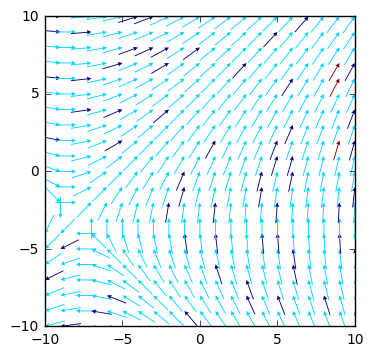

In [423]:
plt.figure()
M = np.hypot(Ustag, Vstag)
Q = plt.quiver(X, Y, Ustag, Vstag, M, units='x', pivot='tip',headwidth=5, scale=1.5)
plt.axis('scaled')

In [433]:
#Combine fields 
Gvort_x = 5      #Radius of gaussian weighting function for vortex field
Gvort_y = Gvort_x
Gstag = 5      #Radius of gaussian weighting function for stagnation point field

Wvort = np.exp(-((X**2)/(2*Gvort_x)+(Y**2)/(2*Gvort_y)))
Wvort_inv = -1*Wvort+1                #invert the weightings so that only vortex appears at vortex location                       

Rstag = np.hypot(Xs, Ys)
Wstag = np.exp(-((X-xs)**2/(2*Gstag)+(Y-ys)**2/(2*Gstag)))
Wstag_inv = -1*Wstag+1

#U = (Wvort*Uvort+Wstag*Ustag)/(Wvort+Wstag)
#V = (Wvort*Vvort+Wstag*Vstag)/(Wvort+Wstag)

U = (Wvort*Wstag_inv*Uvort+Wstag*Wvort_inv*Ustag)/(Wvort*Wstag_inv+Wstag*Wvort_inv)
V = (Wvort*Wstag_inv*Vvort+Wstag*Wvort_inv*Vstag)/(Wvort*Wstag_inv+Wstag*Wvort_inv)

#U = (Wstag_inv*Uvort+Wvort_inv*Ustag)/(Wvort_inv+Wstag_inv)
#V = (Wstag_inv*Vvort+Wvort_inv*Vstag)/(Wvort_inv+Wstag_inv)

In [406]:
Uextra = Uvort
Uextra[:] = 0
Uextra[Y>0] = 0.5

U = U+Uextra

(-10.0, 10.0, -10.0, 10.0)

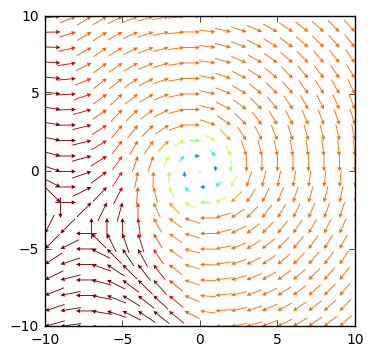

In [434]:
plt.figure()
M = np.hypot(U, V)
Q = plt.quiver(X, Y, U, V, M, units='x', pivot='tip',headwidth=5, scale=1.5)
plt.axis('scaled')

In [452]:
reload(PIVutils)
Conv = 0
[U, V] = PIVutils.genHairpinField(BoxSize,Circ,r,xs,ys,Rot,StagStren,Gvort_x,Gstag,Conv)

/Users/Owen/Dropbox/Python Codes/ASIIT/PIVutils.py:454: RuntimeWarning: invalid value encountered in true_divide
  Vstag = V/M*StagStren
/Users/Owen/Dropbox/Python Codes/ASIIT/PIVutils.py:455: RuntimeWarning: invalid value encountered in true_divide
  


(-10.0, 10.0, -10.0, 10.0)

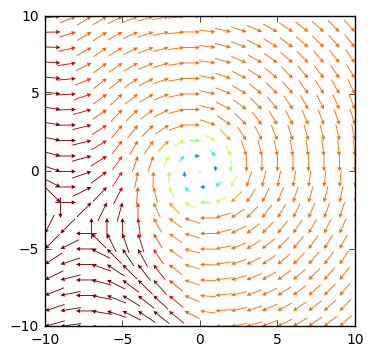

In [453]:
plt.figure()
M = np.hypot(U, V)
Q = plt.quiver(X, Y, U, V, M, units='x', pivot='tip',headwidth=5, scale=1.5)
plt.axis('scaled')

In [457]:
from scipy.optimize import minimize
minimize?